In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('2023_01_06.csv')

In [13]:
df.head()

,행정동명,연월,남자 비율,여자 비율,총 이동인구(합),0대 비율,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,60대 이상 비율
0,경기도 가평군 가평읍,2023-01,0.551475,0.448514,82528.65,0.008307,0.076629,0.240433,0.162778,0.157458,0.170571,0.183825
1,경기도 가평군 북면,2023-01,0.517977,0.481972,19232.02,0.015438,0.063985,0.218769,0.214097,0.157221,0.140768,0.189722
2,경기도 가평군 상면,2023-01,0.530617,0.469362,47935.86,0.011640,0.055250,0.174359,0.193622,0.168866,0.170588,0.225674
3,경기도 가평군 설악면,2023-01,0.538903,0.461090,138725.14,0.008287,0.056222,0.201814,0.189438,0.178470,0.182451,0.183318
4,경기도 가평군 조종면,2023-01,0.582136,0.417833,29379.57,0.008727,0.045688,0.192120,0.172998,0.150026,0.175308,0.255133


C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


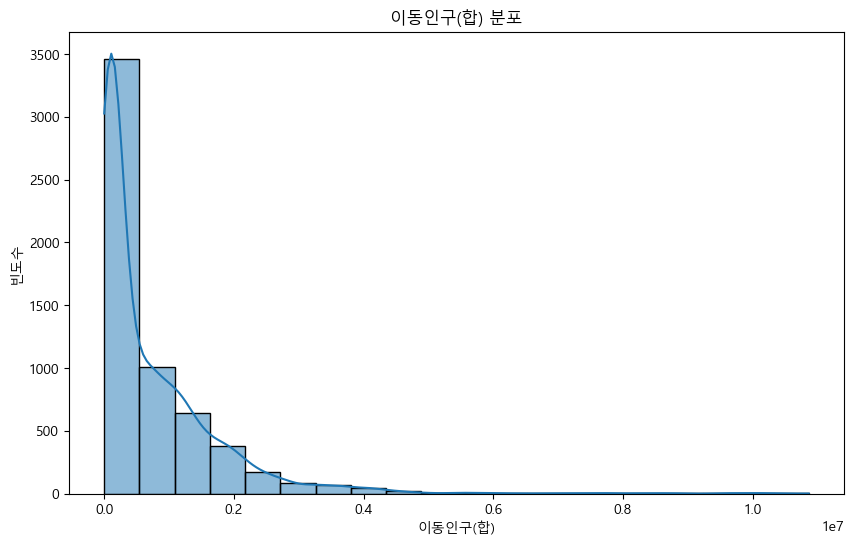

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows 환경의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이동인구(합) 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['총 이동인구(합)'], bins=20, kde=True)
plt.title('이동인구(합) 분포')
plt.xlabel('이동인구(합)')
plt.ylabel('빈도수')
plt.show()


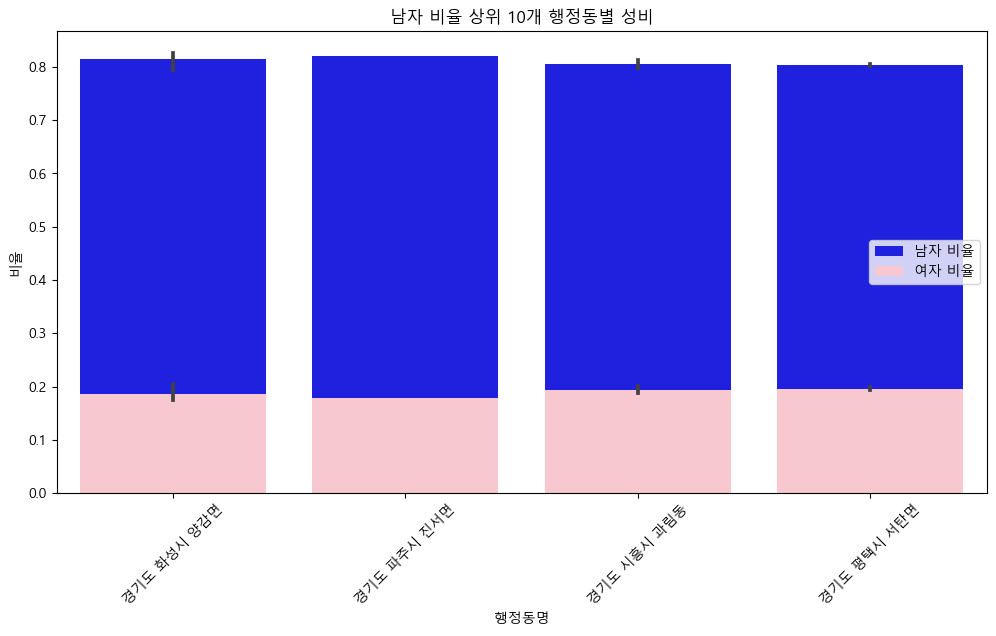

In [24]:
top_10_male_ratio = df.nlargest(10, '남자 비율')

# 성비 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_male_ratio, x='행정동명', y='남자 비율', color='blue', label='남자 비율')
sns.barplot(data=top_10_male_ratio, x='행정동명', y='여자 비율', color='pink', label='여자 비율')
plt.xticks(rotation=45)
plt.title('남자 비율 상위 10개 행정동별 성비')
plt.xlabel('행정동명')
plt.ylabel('비율')
plt.legend()
plt.show()

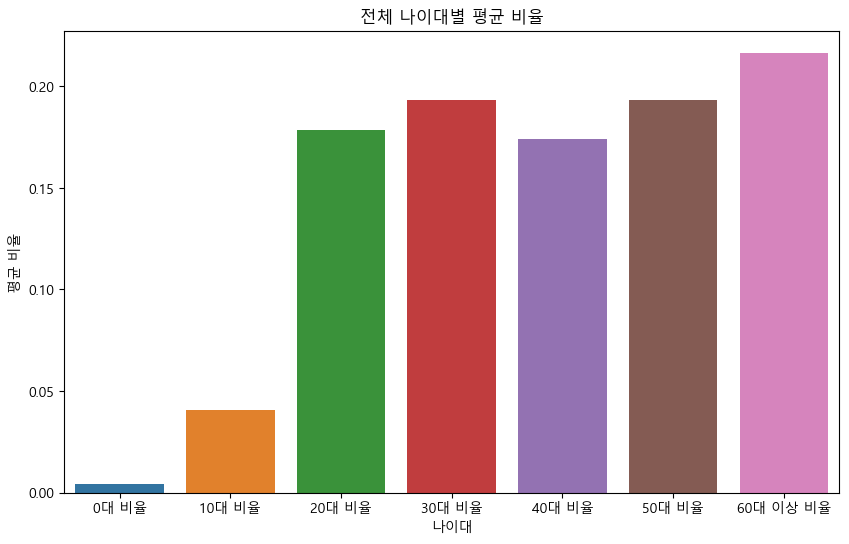

In [20]:
# 나이대별 비율 시각화
age_columns = ['0대 비율', '10대 비율', '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 이상 비율']
age_ratio_df = df[age_columns].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_ratio_df.index, y=age_ratio_df.values)
plt.title('전체 나이대별 평균 비율')
plt.xlabel('나이대')
plt.ylabel('평균 비율')
plt.show()


C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


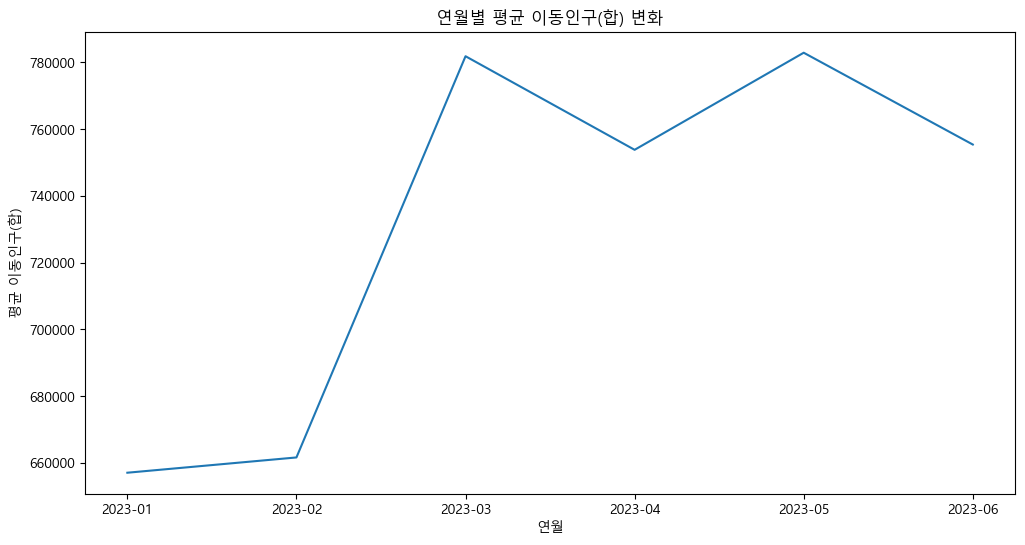

In [25]:
# inf 값을 NaN으로 변환
df['총 이동인구(합)'] = df['총 이동인구(합)'].replace([float('inf'), -float('inf')], pd.NA)

# 연월별 이동인구(합) 평균 변화 시각화
monthly_population = df.groupby('연월')['총 이동인구(합)'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_population.index, y=monthly_population.values)
plt.title('연월별 평균 이동인구(합) 변화')
plt.xlabel('연월')
plt.ylabel('평균 이동인구(합)')
plt.show()


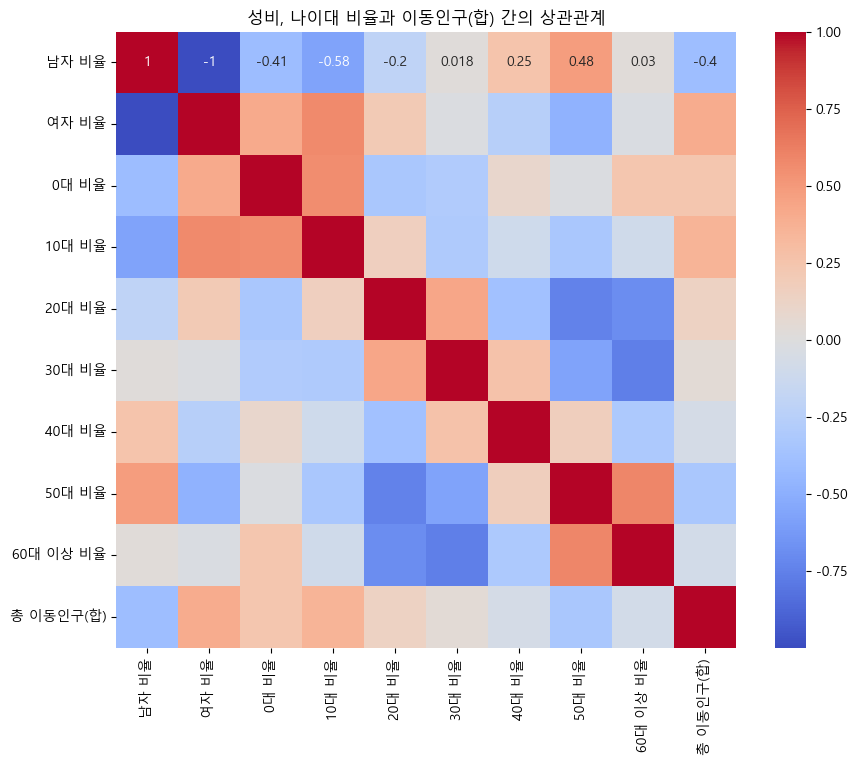

In [26]:
# 성비, 나이대 비율과 총 이동인구(합) 간의 상관관계 분석
correlation_df = df[['남자 비율', '여자 비율', '0대 비율', '10대 비율', '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 이상 비율', '총 이동인구(합)']]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('성비, 나이대 비율과 이동인구(합) 간의 상관관계')
plt.show()


C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


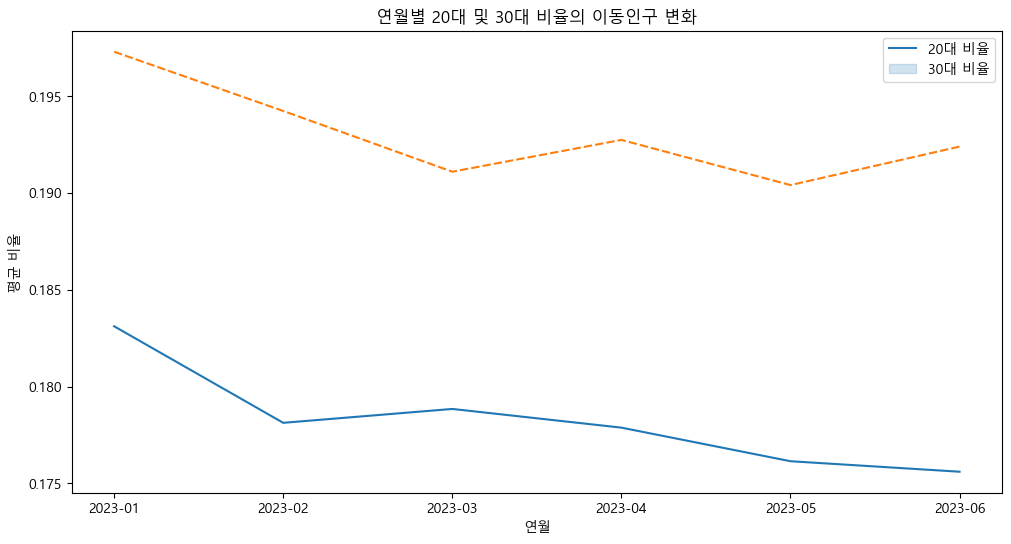

In [27]:
# 연월별 20대와 30대 비율의 이동인구 추이 시각화
age_population = df.groupby('연월')[['20대 비율', '30대 비율']].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_population)
plt.title('연월별 20대 및 30대 비율의 이동인구 변화')
plt.xlabel('연월')
plt.ylabel('평균 비율')
plt.legend(['20대 비율', '30대 비율'])
plt.show()


In [28]:
# 서울특별시와 경기도 데이터 분리
seoul_data = df[df['행정동명'].str.contains('서울특별시')]
gyeonggi_data = df[df['행정동명'].str.contains('경기도')]

# 이동인구의 평균 비교
seoul_population = seoul_data['총 이동인구(합)'].mean()
gyeonggi_population = gyeonggi_data['총 이동인구(합)'].mean()

print(f"서울특별시 이동인구 평균: {seoul_population}")
print(f"경기도 이동인구 평균: {gyeonggi_population}")


서울특별시 이동인구 평균: 1511592.394245283
경기도 이동인구 평균: 145085.87214031973


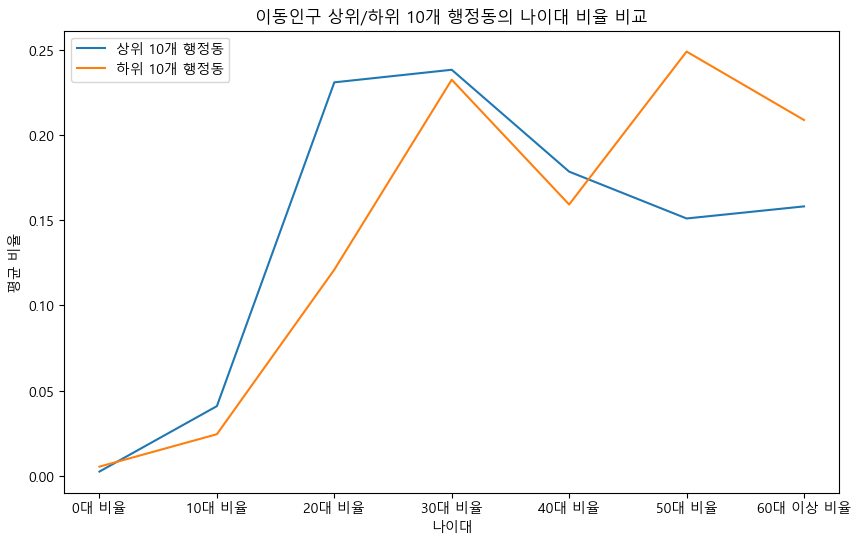

In [29]:
# 이동인구 상위 10개 행정동
top_10_population = df.nlargest(10, '총 이동인구(합)')

# 이동인구 하위 10개 행정동
bottom_10_population = df.nsmallest(10, '총 이동인구(합)')

# 상위 10개 행정동과 하위 10개 행정동의 나이대 비율 비교
top_10_age_ratio = top_10_population[['0대 비율', '10대 비율', '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 이상 비율']].mean()
bottom_10_age_ratio = bottom_10_population[['0대 비율', '10대 비율', '20대 비율', '30대 비율', '40대 비율', '50대 비율', '60대 이상 비율']].mean()

plt.figure(figsize=(10, 6))
plt.plot(top_10_age_ratio, label='상위 10개 행정동')
plt.plot(bottom_10_age_ratio, label='하위 10개 행정동')
plt.title('이동인구 상위/하위 10개 행정동의 나이대 비율 비교')
plt.xlabel('나이대')
plt.ylabel('평균 비율')
plt.legend()
plt.show()
